**#Credit Card Approval Capstoen Project**

##1  Section 1


Q 1.Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?  

The proposal’s importance lies in the fact that it revolutionize the way of banks assess creditworthiness, make leading decisions and benefitting both financial institutions and their customers.

Predicting a good client is essential for banks to reduce financial risk, fraud prevention, improve customer experience and remain competitive.

Q 2:How is it going to impact the banking sector?

The model helps banks in :
1. Reducing default risks.
2. Improving operational efficiency.
3. Enhancing customer satisfaction.
4. Boosting competitive advantage.
5. Ensuring regulatory compliance.

Q3:If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.

The potential gap in knowledge is the need for more comprehensive and up-to-date data specific to the Indian banking context.

The proposed model will make indian banks more informed and helps them in data-driven credit decisions, adapting to evolving consumer trends, reducing non-performing assets, and ultimately contributing to the stability and growth of the banking sector in India.

##IMPORTING AND UNDERSTANDING THE DATASET

In [ ]:
#importing all data analysis and model bulding libraries

#data manipulation libraries
import pandas as pd
import numpy as np

#import data visulatisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

#for missing value visualization
!pip install missingno
import missingno as msno

#for standardization
from sklearn.preprocessing import StandardScaler

#for spiltting data into training and testing,for performing cross validation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import StratifiedKFold

#For balancing dataset using smote library
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# For feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# For model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# For model evaluation
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, auc, average_precision_score
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score, precision_recall_curve

# For cross validation
from sklearn.model_selection import GridSearchCV

In [ ]:
#importing dataset and merging two dataset into one
df1 =pd.read_csv("/content/Credit_card.csv")

df2 =pd.read_csv("/content/Credit_card_label.csv")

#merging two datasets into one
df =pd.merge(df1,df2,how='inner',on='Ind_ID')
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


##Section 2:Initial Hypothesis

#####Hypothtical Statement

hypothetical statement:-Property Owners are more likely to have their credit card applications approved.

Null Hypothesis:There is a significant association between property ownership and credit card approval.

Alternate Hypothesis:There is a no significant association between property ownership and credit card approval.

from above hypothetical testing it state that the null hypothesis accepted.it means that the there is  a significant association between property ownership and credit card approval.


###Hypothetical statement 2:
Null Hypothesis:There is no significant association between education level and credit card application rejection.

Alternative Hypothesis:There is a significant association between education level and credit card application rejection.

##3. Data Analysis Section

##3.1 Basic Exploration of Data

In [ ]:
#copy credit card data
df_copy =df.copy()

In [ ]:
#finding shape of data
df_copy.shape

(1548, 19)

In [ ]:
#finding basic information of data
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
#description of data
df_copy.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [ ]:
#finding duplicated rows
duplicated_row =df_copy[df_copy.duplicated()]
print(duplicated_row)

Empty DataFrame
Columns: [Ind_ID, GENDER, Car_Owner, Propert_Owner, CHILDREN, Annual_income, Type_Income, EDUCATION, Marital_status, Housing_type, Birthday_count, Employed_days, Mobile_phone, Work_Phone, Phone, EMAIL_ID, Type_Occupation, Family_Members, label]
Index: []


In [ ]:
#finding missing value
df_copy.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

##3.2 Renaming of Column

In [ ]:
#converting birthday count days into years
df_copy["Birthday_count"] =round(-df_copy["Birthday_count"]/365,0)
df_copy.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,-586,1,1,1,0,NaN,2,1


In [ ]:
#converting employees days into years
df_copy["Employed_days"] =round(-df_copy["Employed_days"]/365,0)
df_copy.loc[df_copy["Employed_days"]<0,"Employed_days"]=0
df_copy.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,2.0,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,NaN,2,1


In [ ]:
#renaming column
df_copy =df_copy.rename(columns={'Ind_ID':'Ind_Id','GENDER':'Gender','Propert_Owner':'Property_Owner','CHILDREN':'Children',
                        'Annual_income':'Annual_Income','EDUCATION':'Education','Marital_status':'Marital_Status',
                        'Housing_type':'Housing_Type','Birthday_count':'Years_of_Birth','Employed_days':'Employed_Years',
                        'Mobile_phone':'Mobile_Phone','EMAIL_ID':'Email_Id','label':'Label'})
df_copy.head()

,Ind_Id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,Years_of_Birth,Employed_Years,Mobile_Phone,Work_Phone,Phone,Email_Id,Type_Occupation,Family_Members,Label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,2.0,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,NaN,2,1


##3.3 Deleting Unwanted Column

In [ ]:
#Deleting Unwanted Column
df_copy_del =df_copy.drop(["Mobile_Phone","Work_Phone","Phone","Email_Id"],axis=1)
df_copy_del.head()

,Ind_Id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,Years_of_Birth,Employed_Years,Type_Occupation,Family_Members,Label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,2.0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,NaN,2,1


##3.4 Data Analysis Visualization

In [ ]:
#copy deleting dataset
credit_card_analysis =df_copy_del.copy()

1.Gender Column

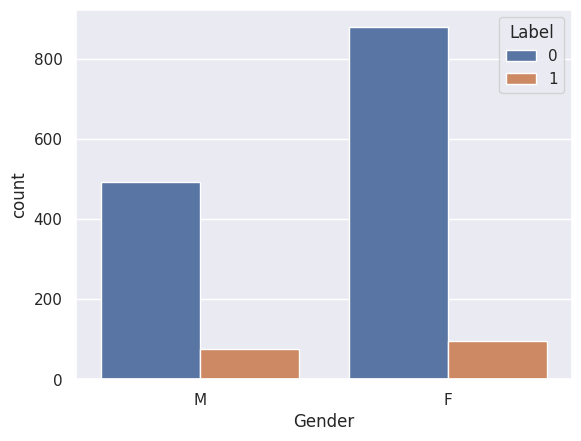

In [ ]:
#plotting count plot
sns.set()
sns.countplot(x='Gender',data=credit_card_analysis,hue="Label")
plt.show()

In [ ]:
#to find the value counts gender column after grouping the label column
credit_card_analysis.groupby('Label')["Gender"].value_counts()

Label  Gender
0      F         878
       M         493
1      F          95
       M          75
Name: Gender, dtype: int64

##Inference
1.from the above we have seen that female candidate have a more number of credit card approval than male candidate.

2.Car_Owner

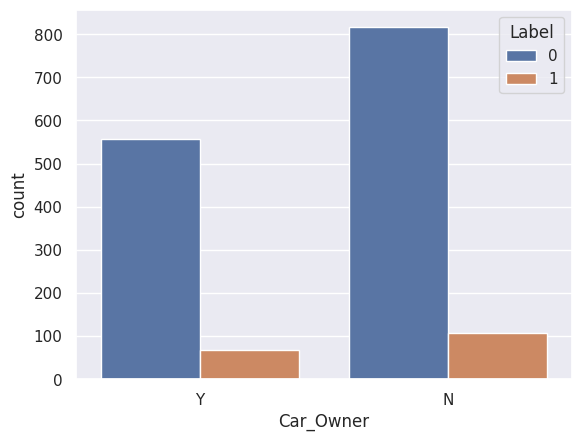

In [ ]:
#plotting count plot
sns.countplot(x='Car_Owner',data=credit_card_analysis,hue="Label")
plt.show()

In [ ]:
#to find the value counts gender column after grouping the label column
credit_card_analysis.groupby('Label')["Car_Owner"].value_counts()

Label  Car_Owner
0      N            816
       Y            557
1      N            108
       Y             67
Name: Car_Owner, dtype: int64

##Inference
1.car owner(624) and those who dont have a car(924) have a applied for credit card.

3.Property_Owner Column

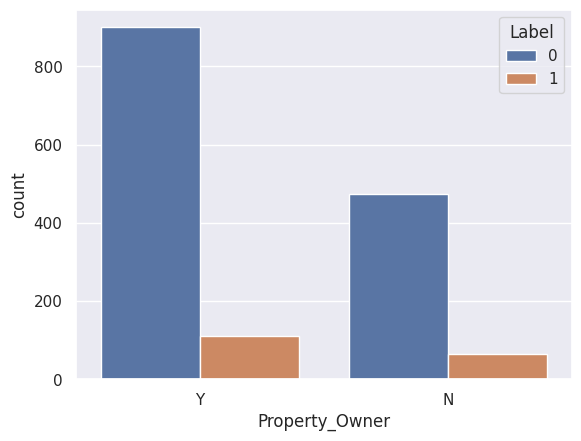

In [ ]:
#ploting countplot
sns.countplot(x='Property_Owner',data=credit_card_analysis,hue="Label")
plt.show()

In [ ]:
#to find the value counts gender column after grouping the label column
credit_card_analysis.groupby('Label')["Car_Owner"].value_counts()

Label  Car_Owner
0      N            816
       Y            557
1      N            108
       Y             67
Name: Car_Owner, dtype: int64

##Inference
1. Property owners (1010) and those who don’t own a property (538) have applied for credit card.

4.Children Column

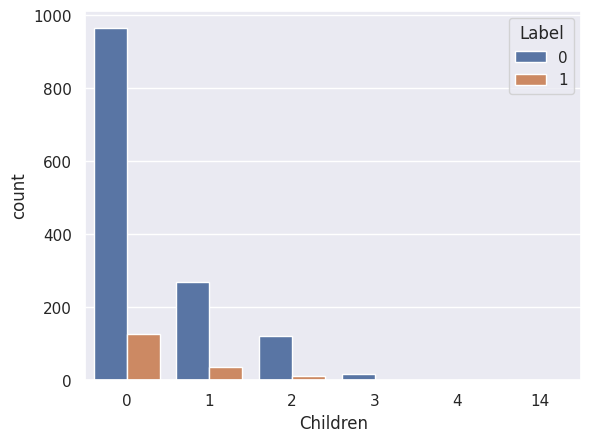

In [ ]:
#ploting countplot
sns.countplot(x='Children',data=credit_card_analysis,hue="Label")
plt.show()

In [ ]:
#to find the value counts gender column after grouping the label column
credit_card_analysis.groupby('Label')["Car_Owner"].value_counts()

Label  Car_Owner
0      N            816
       Y            557
1      N            108
       Y             67
Name: Car_Owner, dtype: int64

Inference: As number of Children increase approval rate of credit card also decreases.

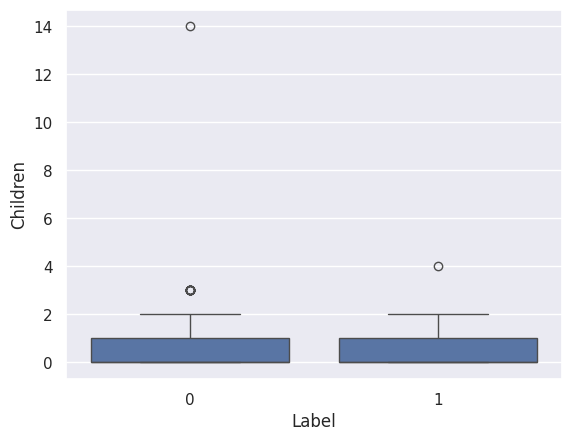

In [ ]:
#ploting boxplot
sns.boxplot(x="Label",y="Children",data=credit_card_analysis)
plt.show()

Inference:There are few outlier detecting in children column.

5.Annual_Income Column

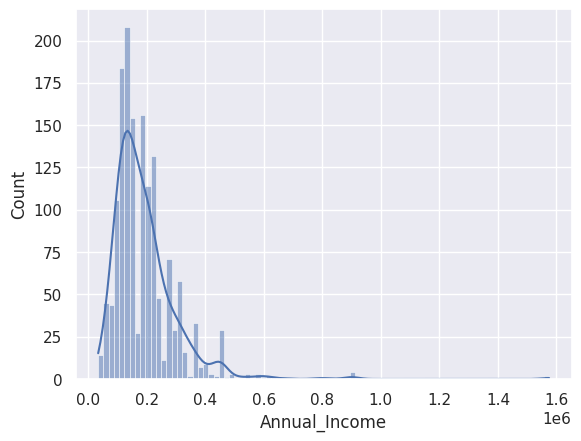

In [ ]:
#ploting histplot
sns.histplot(x="Annual_Income",data=credit_card_analysis,kde=True)
plt.show()

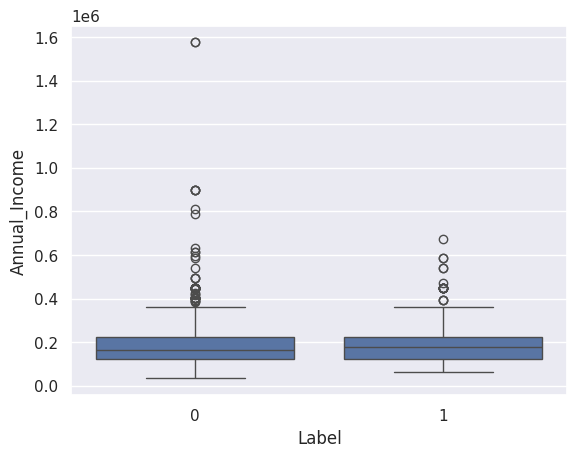

In [ ]:
#ploting boxplot
sns.boxplot(x="Label",y="Annual_Income",data=credit_card_analysis)
plt.show()

Inference:There are lots of outlier in approved and rejected column.

6.Type_Income Column

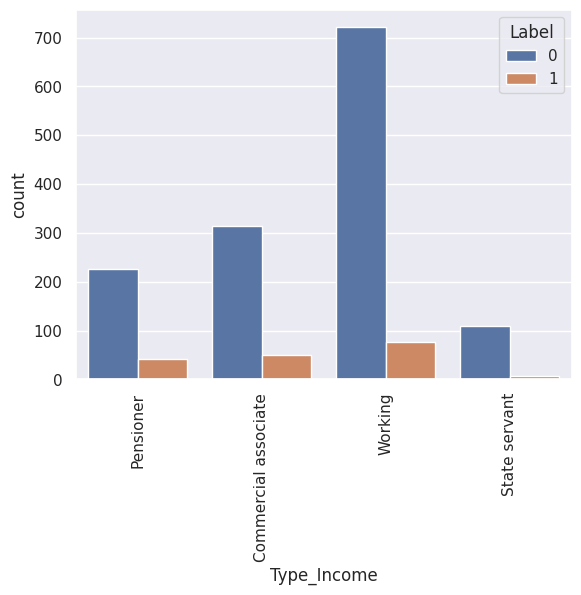

In [ ]:
#plotting count plot
sns.countplot(x='Type_Income',data=credit_card_analysis,hue="Label")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#to find the value counts gender column after grouping the label column
credit_card_analysis.groupby('Label')["Type_Income"].value_counts()

Label  Type_Income         
0      Working                 721
       Commercial associate    315
       Pensioner               227
       State servant           110
1      Working                  77
       Commercial associate     50
       Pensioner                42
       State servant             6
Name: Type_Income, dtype: int64

1. Working people (798), Commercial associates (365), Pensioners (269) and State servants(116) have applied for credit card.

7.Education Column

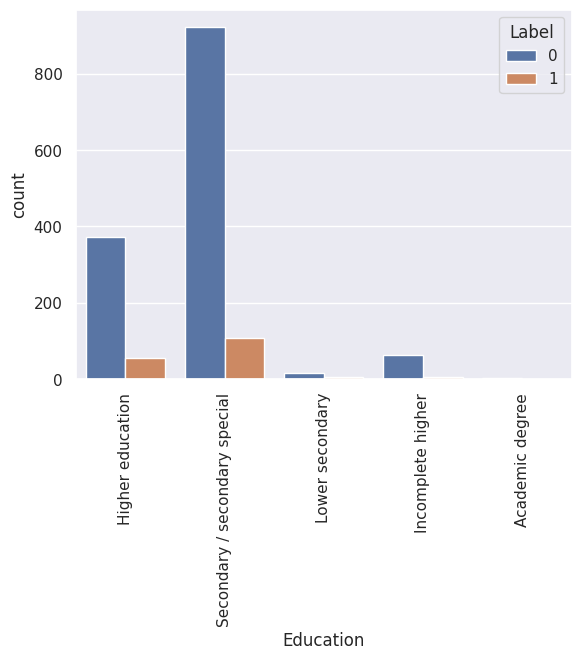

In [ ]:
#plotting count plot
sns.countplot(x='Education',data=credit_card_analysis,hue="Label")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#to find the value counts gender column after grouping the label column
credit_card_analysis.groupby('Label')["Education"].value_counts()

Label  Education                    
0      Secondary / secondary special    922
       Higher education                 371
       Incomplete higher                 63
       Lower secondary                   15
       Academic degree                    2
1      Secondary / secondary special    109
       Higher education                  55
       Lower secondary                    6
       Incomplete higher                  5
Name: Education, dtype: int64

1. Persons who have educated till Secondary / secondary special (1101), Higher education(426), Incomplete higher (68), Lower secondary (21) and Academic degree (2) have applied for credit card.

8.Marital_Status

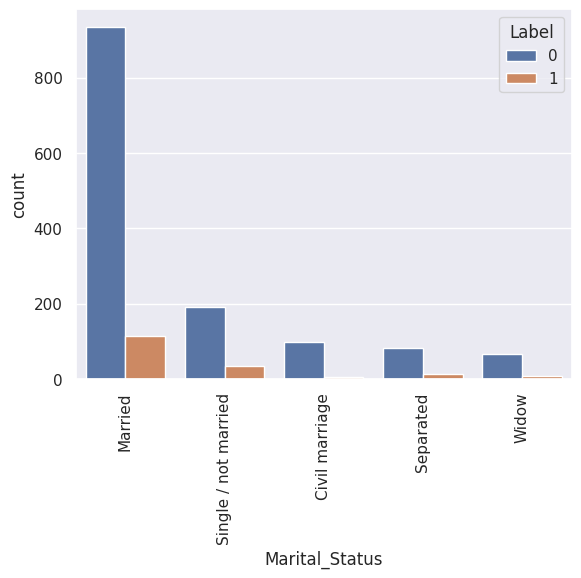

In [ ]:
#plotting count plot
sns.countplot(x='Marital_Status',data=credit_card_analysis,hue="Label")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#to find the value counts gender column after grouping the label column
credit_card_analysis.groupby('Label')["Marital_Status"].value_counts()

Label  Marital_Status      
0      Married                 935
       Single / not married    192
       Civil marriage           97
       Separated                82
       Widow                    67
1      Married                 114
       Single / not married     35
       Separated                14
       Widow                     8
       Civil marriage            4
Name: Marital_Status, dtype: int64

1. Married (1049), Single / not married (227), Civil marriage (101), Separated (96), Widow(75) have applied for credit card.

9. Housing_Type Column

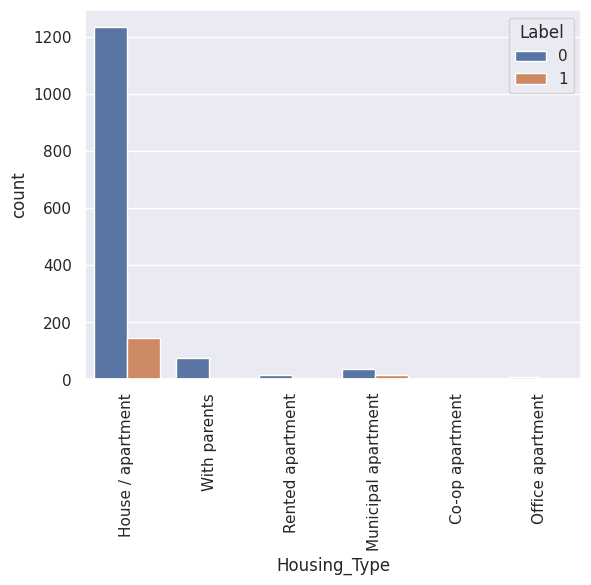

In [ ]:
#plotting count plot
sns.countplot(x='Housing_Type',data=credit_card_analysis,hue="Label")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#to find the value counts gender column after grouping the label column
credit_card_analysis.groupby('Label')["Housing_Type"].value_counts()

Label  Housing_Type       
0      House / apartment      1234
       With parents             75
       Municipal apartment      37
       Rented apartment         17
       Office apartment          7
       Co-op apartment           3
1      House / apartment       146
       Municipal apartment      16
       With parents              5
       Rented apartment          4
       Co-op apartment           2
       Office apartment          2
Name: Housing_Type, dtype: int64

1. People living in House / apartment (1380), With parents (80), Municipal apartment (53),Rented apartment (21), Office apartment (9), Co-op apartment (5) have applied for credit card.

10. Years_Of_Birth Column

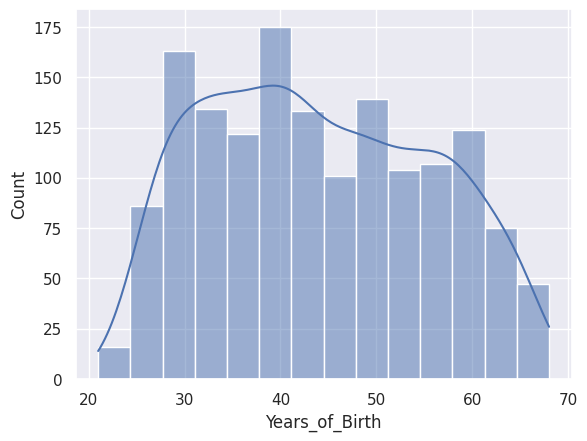

In [ ]:
#ploting histplot
sns.histplot(x="Years_of_Birth",data=credit_card_analysis,kde=True)
plt.show()

not a normally distributed.

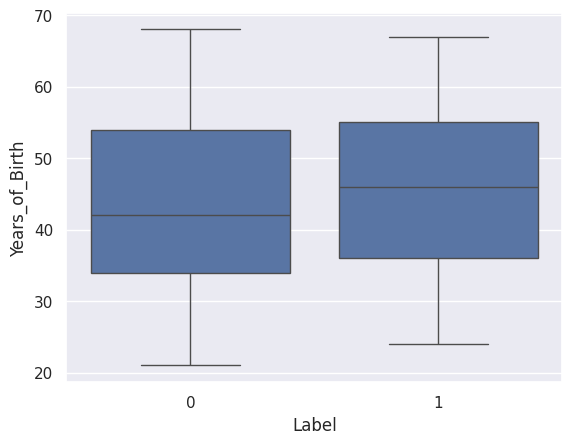

In [ ]:
#ploting boxplot
sns.boxplot(x="Label",y="Years_of_Birth",data=credit_card_analysis)
plt.show()

No outlier in Years_of_Birth column.

11. Employed_Years Column

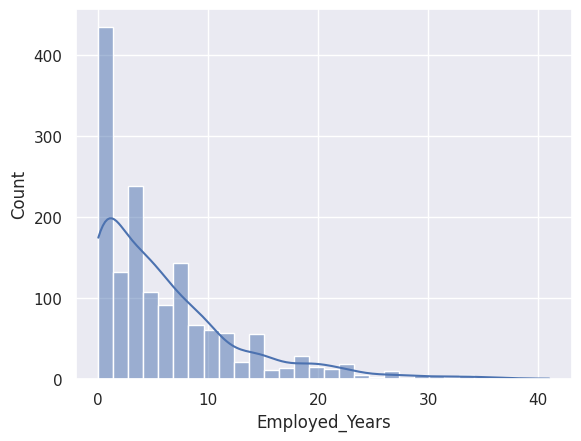

In [ ]:
#ploting histplot
sns.histplot(x="Employed_Years",data=credit_card_analysis,kde=True)
plt.show()

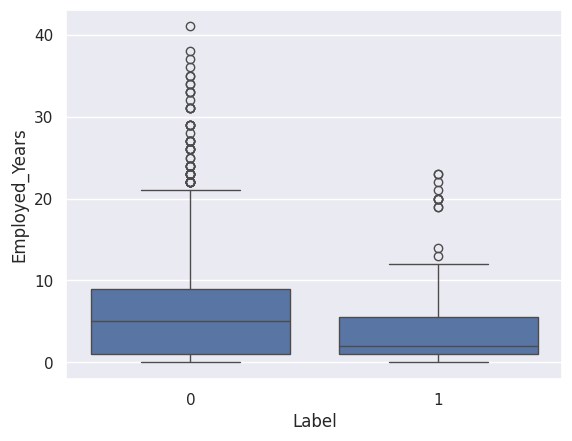

In [ ]:
#ploting boxplot
sns.boxplot(x="Label",y="Employed_Years",data=credit_card_analysis)
plt.show()

Lots of outlier present in Employed_Years.

12. Type_Occupation Column

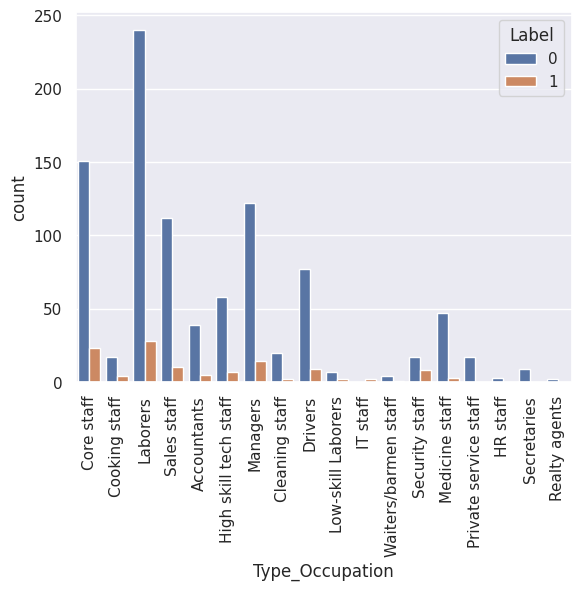

In [ ]:
#plotting count plot
sns.countplot(x='Type_Occupation',data=credit_card_analysis,hue="Label")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#to find the value counts gender column after grouping the label column
credit_card_analysis.groupby('Label')["Type_Occupation"].value_counts()

Label  Type_Occupation      
0      Laborers                 240
       Core staff               151
       Managers                 122
       Sales staff              112
       Drivers                   77
       High skill tech staff     58
       Medicine staff            47
       Accountants               39
       Cleaning staff            20
       Cooking staff             17
       Private service staff     17
       Security staff            17
       Secretaries                9
       Low-skill Laborers         7
       Waiters/barmen staff       4
       HR staff                   3
       Realty agents              2
1      Laborers                  28
       Core staff                23
       Managers                  14
       Sales staff               10
       Drivers                    9
       Security staff             8
       High skill tech staff      7
       Accountants                5
       Cooking staff              4
       Medicine staff             3

Laborers (268), Core staff (174), Managers (136), Sales staff (132), Drivers (86), High skill tech staff (65), Medicine staff (50), Accountants (44), Cleaning staff (22), Cooking staff (21), Private service staff (17), Security staff (25), Secretaries (9),Low-skill Laborers(9), Waiters/barmen staff (5), HR staff (3), Realty agents (2), IT staff (2) have applied for credit card.

13. Family_Members Column

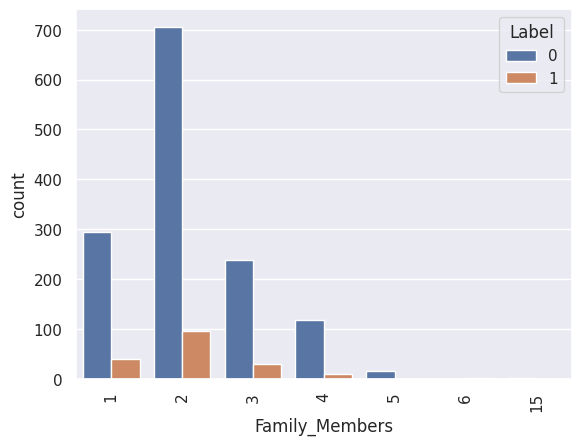

In [ ]:
#plotting count plot
sns.countplot(x='Family_Members',data=credit_card_analysis,hue="Label")
plt.xticks(rotation=90)
plt.show()

Person having family members as 2 have applied highest and family member above 5 have applied lowest for credit card.

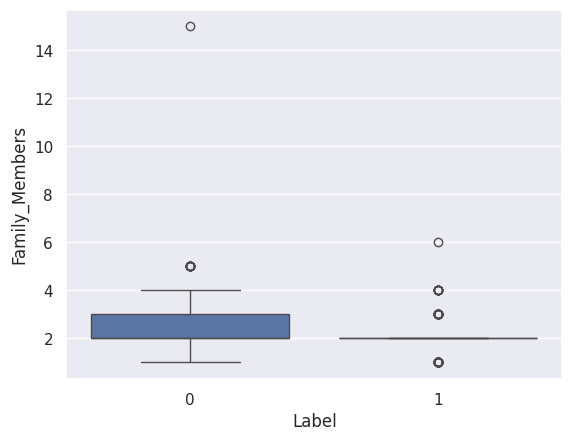

In [ ]:
#ploting boxplot
sns.boxplot(x="Label",y="Family_Members",data=credit_card_analysis)
plt.show()

There are lot of outlier especially for rejected application.

##Multivariate Analysis

In [ ]:
#selecting numerical Column
num_col =credit_card_analysis.select_dtypes(include=['int64','float64']).columns.tolist()
cc_numerical =credit_card_analysis[num_col]
cc_numerical.head()

,Ind_Id,Children,Annual_Income,Years_of_Birth,Employed_Years,Family_Members,Label
0,5008827,0,180000.0,51.0,0.0,2,1
1,5009744,0,315000.0,37.0,2.0,2,1
2,5009746,0,315000.0,NaN,2.0,2,1
3,5009749,0,NaN,37.0,2.0,2,1
4,5009752,0,315000.0,37.0,2.0,2,1


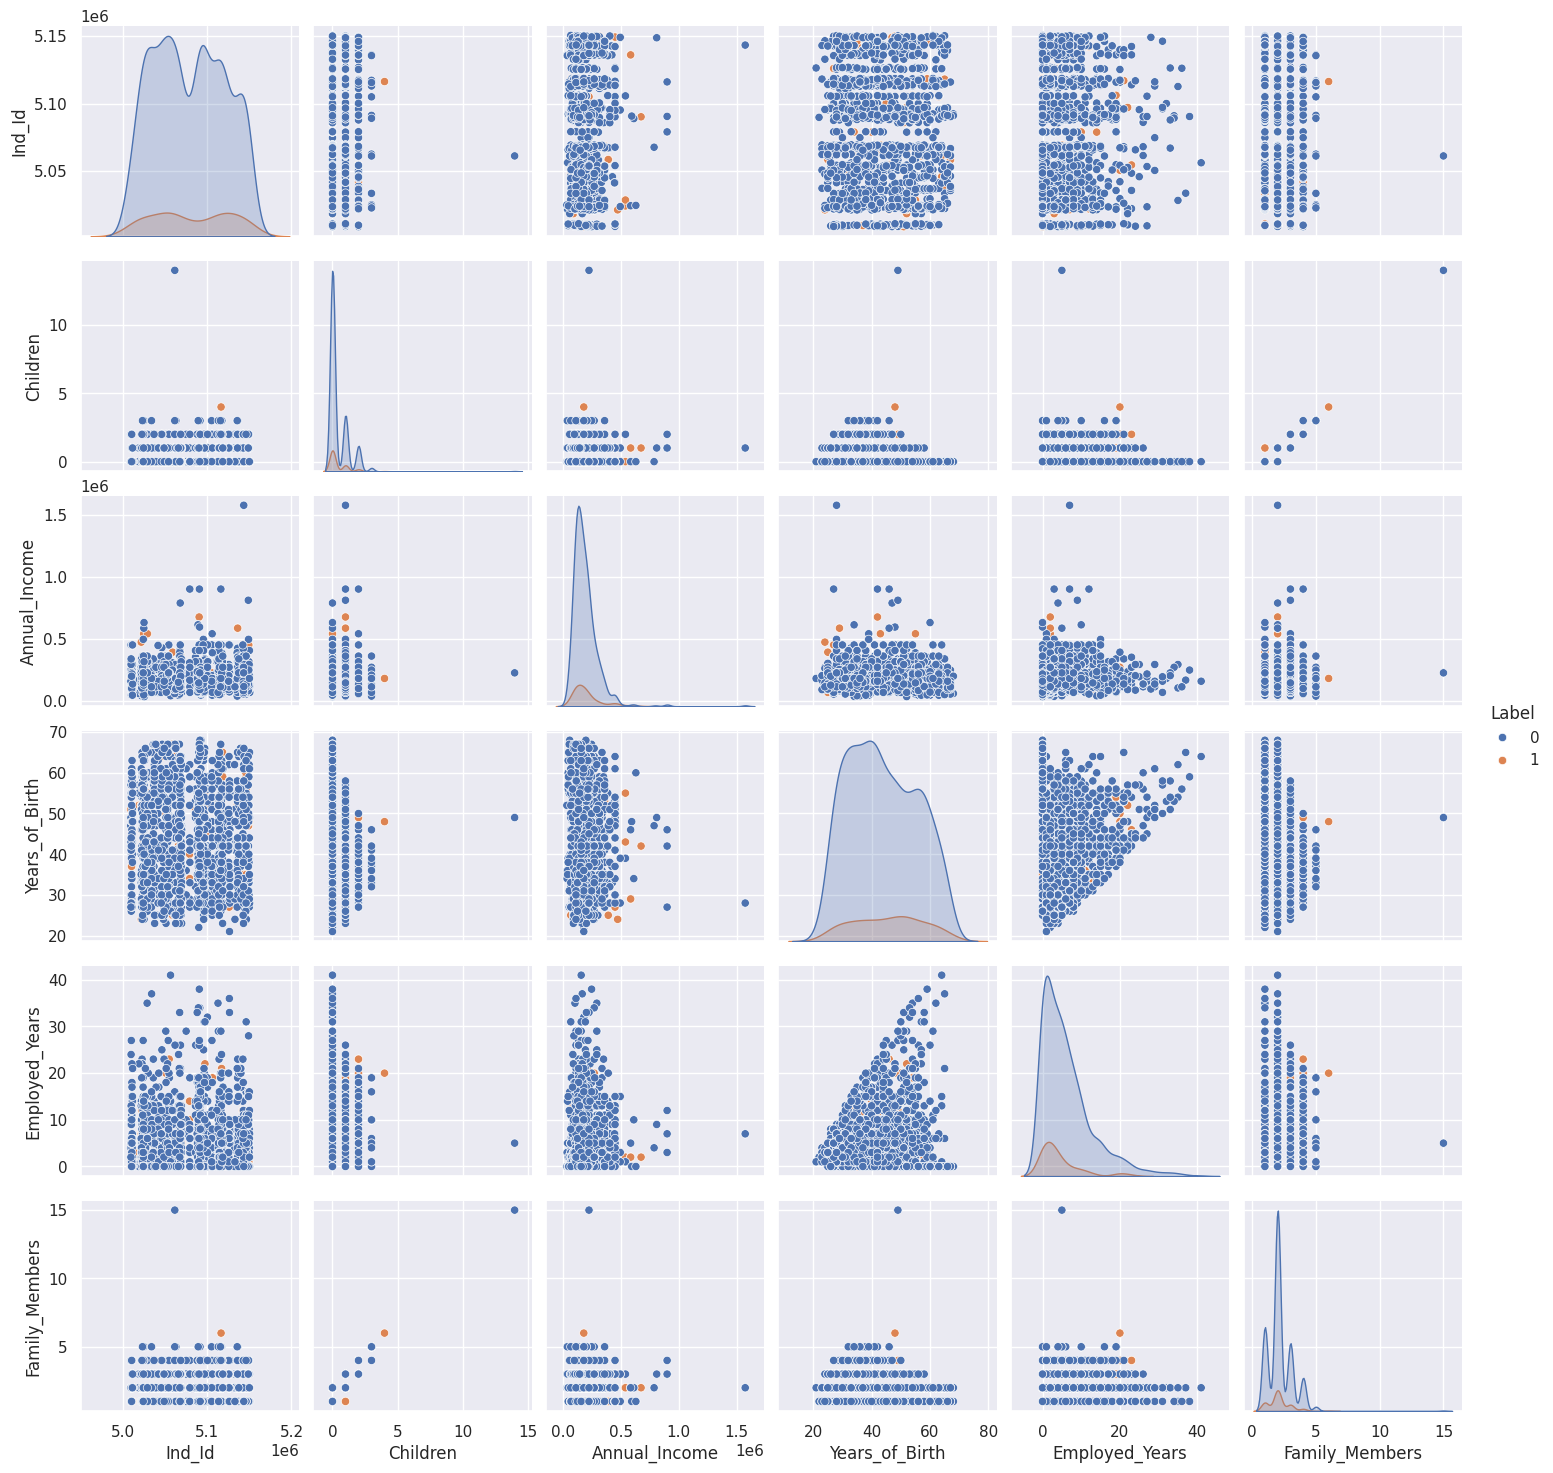

In [ ]:
#ploting pairplot
sns.pairplot(cc_numerical,hue='Label')
plt.show()

In [ ]:
#finding correlation
cc_numerical.corr()

,Ind_Id,Children,Annual_Income,Years_of_Birth,Employed_Years,Family_Members,Label
Ind_Id,1.000000,0.032535,0.030147,-0.022150,0.009371,0.016950,0.016796
Children,0.032535,1.000000,0.078497,-0.278516,0.073313,0.890248,-0.021646
Annual_Income,0.030147,0.078497,1.000000,-0.111294,0.051672,0.050957,0.027456
Years_of_Birth,-0.022150,-0.278516,-0.111294,1.000000,-0.022755,-0.265000,0.045112
Employed_Years,0.009371,0.073313,0.051672,-0.022755,1.000000,0.092535,-0.095189
Family_Members,0.016950,0.890248,0.050957,-0.265000,0.092535,1.000000,-0.030709
Label,0.016796,-0.021646,0.027456,0.045112,-0.095189,-0.030709,1.000000


<Axes: >

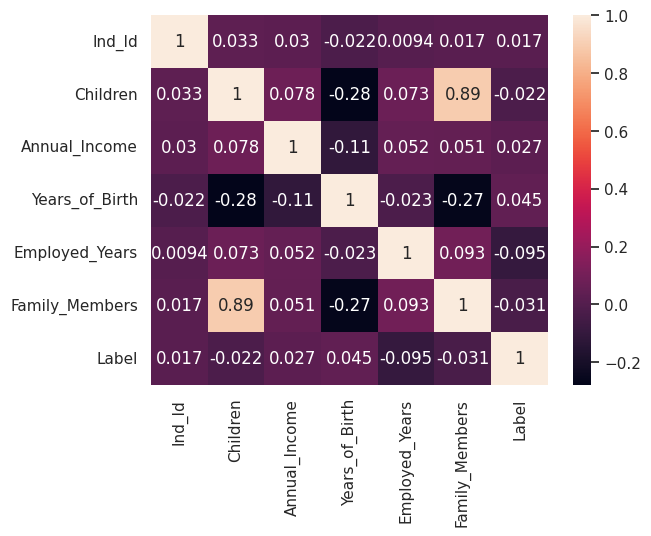

In [ ]:
#ploting heatmap
sns.heatmap(cc_numerical.corr(),annot=True)

##3.5 Data Cleaning

Visualization of Missing Values

In [ ]:
#copy the dataset
cc_missing_value =credit_card_analysis.copy()

In [ ]:
#finding the missing value
cc_missing_value.isnull().sum()

Ind_Id               0
Gender               7
Car_Owner            0
Property_Owner       0
Children             0
Annual_Income       23
Type_Income          0
Education            0
Marital_Status       0
Housing_Type         0
Years_of_Birth      22
Employed_Years       0
Type_Occupation    488
Family_Members       0
Label                0
dtype: int64

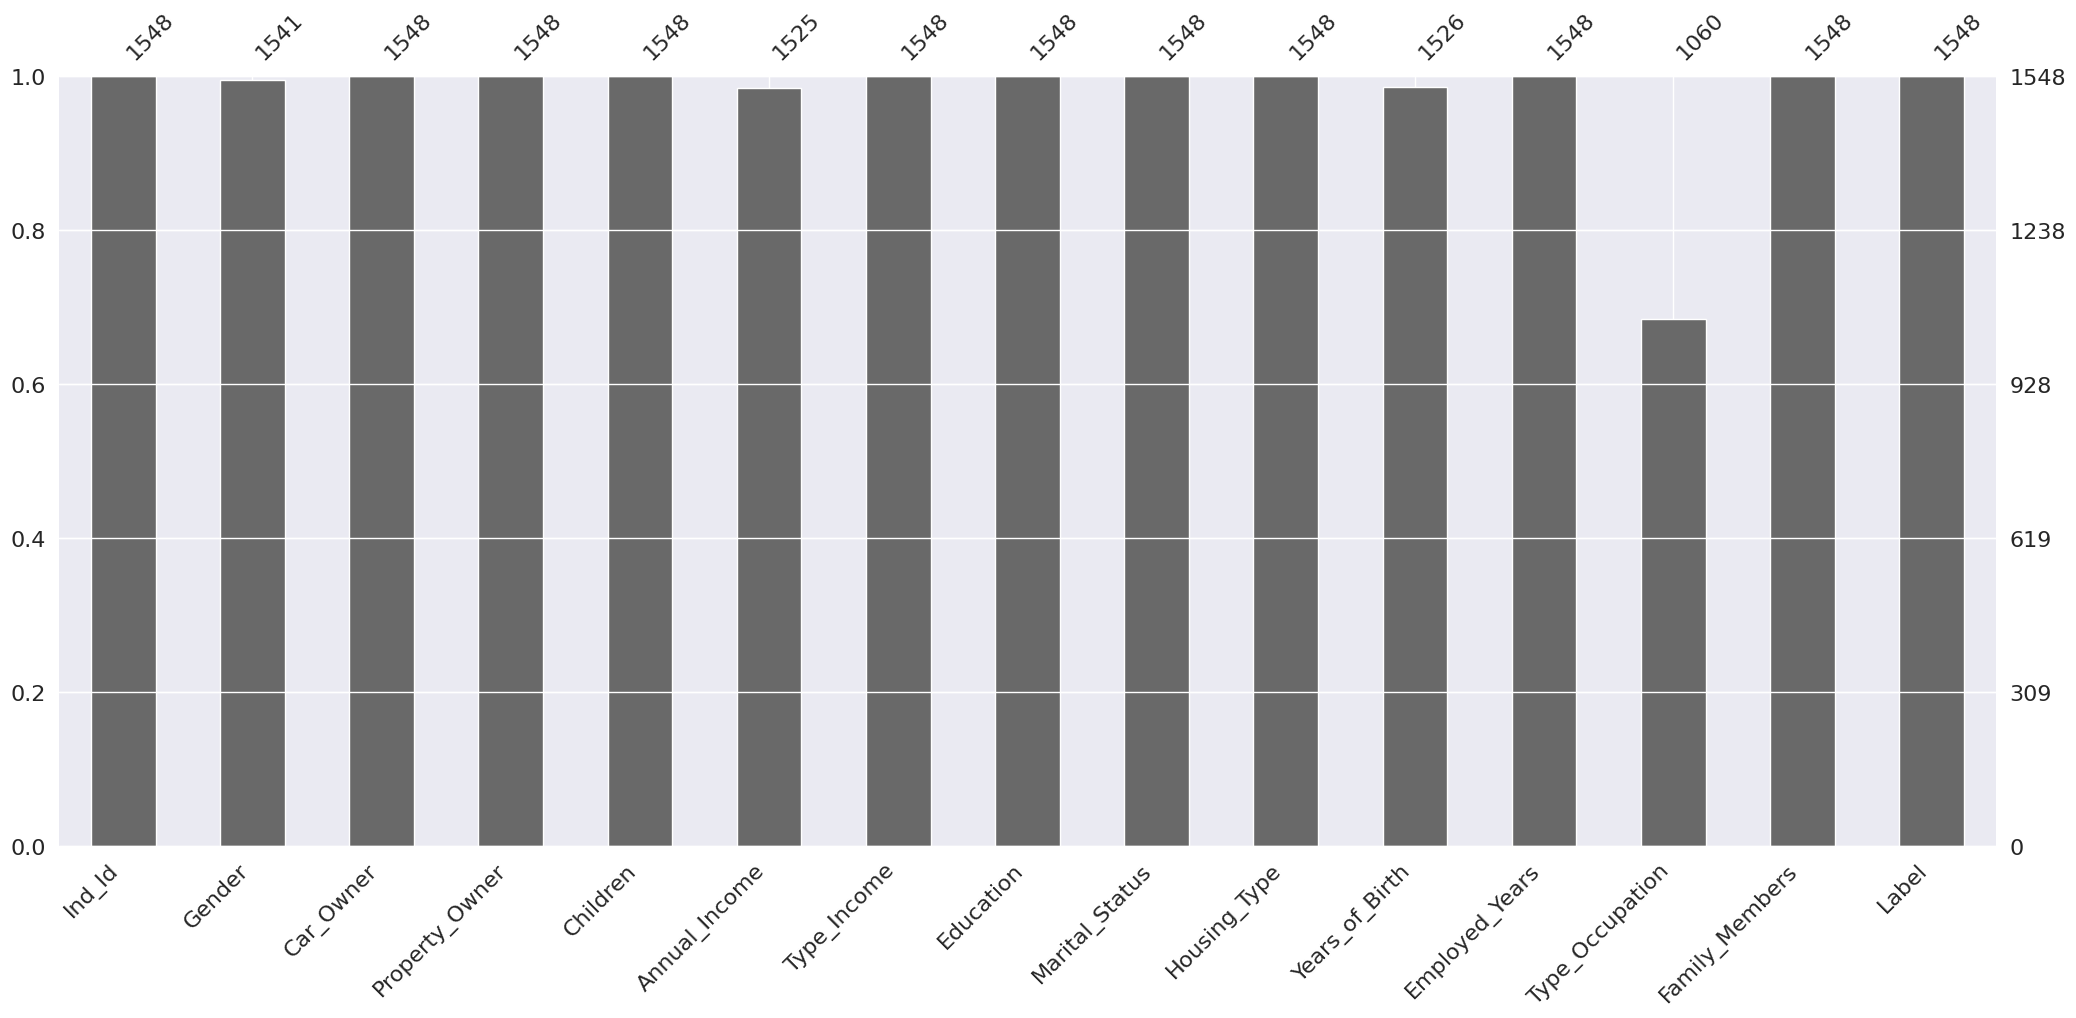

In [ ]:
#visualization of missing value
msno.bar(cc_missing_value)
plt.show()

###Imputation Technique

In [ ]:
#filling missing value in type occupation as not known
cc_missing_value["Type_Occupation"] =cc_missing_value["Type_Occupation"].fillna("Unknown")

##Removal Missing Values

In [ ]:
#removing missing value
cc_missing_value =cc_missing_value.dropna()

In [ ]:
#copy cc_missing_value df into credit_card_df and counting the missing value
credit_card_df =cc_missing_value.copy()
credit_card_df.isnull().sum()

Ind_Id             0
Gender             0
Car_Owner          0
Property_Owner     0
Children           0
Annual_Income      0
Type_Income        0
Education          0
Marital_Status     0
Housing_Type       0
Years_of_Birth     0
Employed_Years     0
Type_Occupation    0
Family_Members     0
Label              0
dtype: int64

##Outlier Treatment

In [ ]:
credit_card_df.head()

,Ind_Id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,Years_of_Birth,Employed_Years,Type_Occupation,Family_Members,Label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,Unknown,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,Unknown,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,Unknown,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,Unknown,2,1
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,61.0,0.0,Unknown,2,1


In [ ]:
# Taking Ind_Id, Label column from credit_card_df and forming new df credit_card_outlabel
credit_card_outlabel =credit_card_df[["Ind_Id","Label"]]
credit_card_outlabel.head()

,Ind_Id,Label
0,5008827,1
1,5009744,1
4,5009752,1
6,5009754,1
7,5009894,1


In [ ]:
# Dropping Label column from credit_card_df
credit_card_df =credit_card_df.drop(columns=["Label"])
credit_card_df.head()

,Ind_Id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,Years_of_Birth,Employed_Years,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,Unknown,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,Unknown,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,Unknown,2
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,Unknown,2
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,61.0,0.0,Unknown,2


In [ ]:
#defining remove outlier function to remove
def remove_outlier(df):
  q1 =df.quantile(0.25)
  q3 =df.quantile(0.75)
  IQR =q3 - q1
  df_out = df[~((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis=1)]
  return df_out

In [ ]:
#removing outlier from credit_card_df
credit_card_outclm=remove_outlier(credit_card_df)

<ipython-input-24-265f30909aeb>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 =df.quantile(0.25)
<ipython-input-24-265f30909aeb>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 =df.quantile(0.75)
<ipython-input-24-265f30909aeb>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
#basic information of credit_card_outclm
credit_card_outclm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_Id           1351 non-null   int64  
 1   Gender           1351 non-null   object 
 2   Car_Owner        1351 non-null   object 
 3   Property_Owner   1351 non-null   object 
 4   Children         1351 non-null   int64  
 5   Annual_Income    1351 non-null   float64
 6   Type_Income      1351 non-null   object 
 7   Education        1351 non-null   object 
 8   Marital_Status   1351 non-null   object 
 9   Housing_Type     1351 non-null   object 
 10  Years_of_Birth   1351 non-null   float64
 11  Employed_Years   1351 non-null   float64
 12  Type_Occupation  1351 non-null   object 
 13  Family_Members   1351 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 158.3+ KB


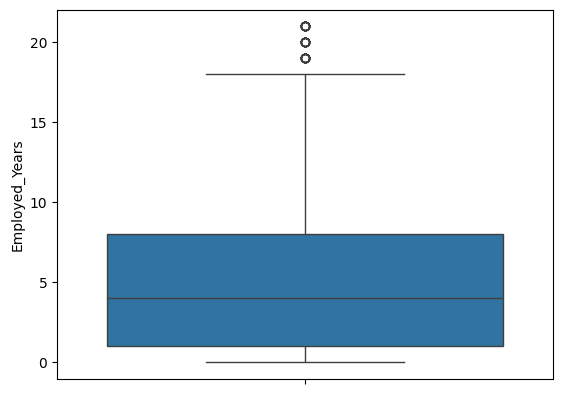

In [ ]:
sns.boxplot(credit_card_outclm["Employed_Years"])
plt.show()

In [ ]:
credit_card_outclm["Employed_Years"].describe()

count    1351.000000
mean        5.212435
std         5.095970
min         0.000000
25%         1.000000
50%         4.000000
75%         8.000000
max        21.000000
Name: Employed_Years, dtype: float64

<ipython-input-29-c8bff4620a68>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_card_outclm["Employed_Years"] =np.where(credit_card_outclm["Employed_Years"]>UC,UC,credit_card_outclm["Employed_Years"])


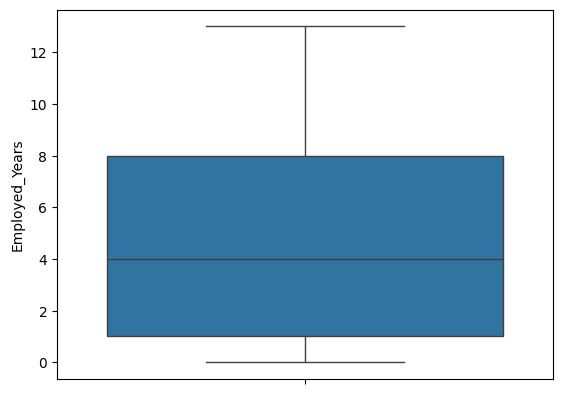

In [ ]:
q1 =8.000000
q3 =1.000000
IQR =q3 -q1
UC =q3 + (1.5 * q1)
credit_card_outclm["Employed_Years"] =np.where(credit_card_outclm["Employed_Years"]>UC,UC,credit_card_outclm["Employed_Years"])
sns.boxplot(credit_card_outclm["Employed_Years"])
plt.show()

In [ ]:
#basic information of credit_card_outclm
credit_card_outclm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_Id           1351 non-null   int64  
 1   Gender           1351 non-null   object 
 2   Car_Owner        1351 non-null   object 
 3   Property_Owner   1351 non-null   object 
 4   Children         1351 non-null   int64  
 5   Annual_Income    1351 non-null   float64
 6   Type_Income      1351 non-null   object 
 7   Education        1351 non-null   object 
 8   Marital_Status   1351 non-null   object 
 9   Housing_Type     1351 non-null   object 
 10  Years_of_Birth   1351 non-null   float64
 11  Employed_Years   1351 non-null   float64
 12  Type_Occupation  1351 non-null   object 
 13  Family_Members   1351 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 158.3+ KB


In [ ]:
# Merging credit_card_outclm and credit_card_df
credit_card_clean =pd.merge(credit_card_outclm,credit_card_outlabel,on="Ind_Id",how ="inner")
credit_card_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351 entries, 0 to 1350
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_Id           1351 non-null   int64  
 1   Gender           1351 non-null   object 
 2   Car_Owner        1351 non-null   object 
 3   Property_Owner   1351 non-null   object 
 4   Children         1351 non-null   int64  
 5   Annual_Income    1351 non-null   float64
 6   Type_Income      1351 non-null   object 
 7   Education        1351 non-null   object 
 8   Marital_Status   1351 non-null   object 
 9   Housing_Type     1351 non-null   object 
 10  Years_of_Birth   1351 non-null   float64
 11  Employed_Years   1351 non-null   float64
 12  Type_Occupation  1351 non-null   object 
 13  Family_Members   1351 non-null   int64  
 14  Label            1351 non-null   int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 168.9+ KB


##3.73.7 CONVERTING credit_card_clean DATAFRAME INTO CSV FILE FOR MYSQL ANALYSIS

In [ ]:
credit_card_clean.to_csv("credit_card_clean.csv")

##Feature Engineering

In [ ]:
credit_card_clean_df =credit_card_clean.copy()

In [ ]:
#converting non numeric column to numeric
#importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
for col in credit_card_clean_df:
  if credit_card_clean_df[col].dtype=='object':
    credit_card_clean_df[col] =le.fit_transform(credit_card_clean_df[col])


In [ ]:
credit_card_clean_df.head()

,Ind_Id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,Years_of_Birth,Employed_Years,Type_Occupation,Family_Members,Label
0,5008827,1,1,1,0,180000.0,1,1,1,1,51.0,0.0,17,2,1
1,5009744,0,1,0,0,315000.0,0,1,1,1,37.0,2.0,17,2,1
2,5009752,0,1,0,0,315000.0,0,1,1,1,37.0,2.0,17,2,1
3,5009754,0,1,0,0,315000.0,0,1,1,1,37.0,2.0,17,2,1
4,5009894,0,0,0,0,180000.0,1,4,1,1,61.0,0.0,17,2,1


In [ ]:
credit_card_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351 entries, 0 to 1350
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_Id           1351 non-null   int64  
 1   Gender           1351 non-null   int64  
 2   Car_Owner        1351 non-null   int64  
 3   Property_Owner   1351 non-null   int64  
 4   Children         1351 non-null   int64  
 5   Annual_Income    1351 non-null   float64
 6   Type_Income      1351 non-null   int64  
 7   Education        1351 non-null   int64  
 8   Marital_Status   1351 non-null   int64  
 9   Housing_Type     1351 non-null   int64  
 10  Years_of_Birth   1351 non-null   float64
 11  Employed_Years   1351 non-null   float64
 12  Type_Occupation  1351 non-null   int64  
 13  Family_Members   1351 non-null   int64  
 14  Label            1351 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 168.9 KB


##DATA ANALYSIS SUMMARY

Q1:What approach are you going to take in order to prove or disprove your hypothesis?

I have performed Data visualization to find the relationship between features and label and inference have been reported above. Future, in ML will perform feature selection to find most important features.

Q2:What feature engineering techniques will be relevant to your project?

I have deleted unwanted columns such as ‘Mobile_Phone’, ‘Work_Phone’, ‘Phone’,
‘Email_Id’ as they are not important for our analysis. Then, have used constant imputation technique for ‘Type_Occupation’ column and remaining column missing values were dropped. Then, Outliers were removed and then encoded categorical columns using label encoder.

Q3:Please justify your data analysis approach.

I have performed following steps in data analysis to make the data clean for ML model to predict.
1. Data visualization using various charts.
2. Data cleaning involving imputation, removing missing values, outlier removal.
3. LabelEncoding of categorical variables

Q4:Identify important patterns in your data using the EDA approach to justify your findings.

I have found important pattern the person who is Female owning car and
property, having less no. of children, working as state servant, who has acedemic degree, who is civil married, living with parents, earning high annual income, age between 30 to 45 and having lesser no. of family member together have the highest chance of loan approval rate.

##4 SECTION 4: MACHINE LEARNING SECTION

##4.1 Spillting data into train and test

In [ ]:
X =credit_card_clean_df.drop(columns=["Ind_Id","Label"])
Y =credit_card_clean_df["Label"]

In [ ]:
#Spilting data into train and test
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
#count the number od rows and columns for train and test
x_train.shape

(1080, 13)

In [ ]:
x_test.shape

(271, 13)

##Balancing the Dataset by SMOTE Technique

In [ ]:
#balancing the training datset
smote =SMOTE(random_state=42)
x_train_balanced,y_train_balanced=smote.fit_resample(x_train,y_train)

In [ ]:
y_train_balanced.value_counts()

0    966
1    966
Name: Label, dtype: int64

##Scaling

In [ ]:
#importing the MinMaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
x_train_balanced=scaler.fit_transform(x_train_balanced)
x_test =scaler.fit_transform(x_test)

##Logistic Regression Classifier

In [ ]:
log_reg =LogisticRegression()
log_reg.fit(x_train_balanced,y_train_balanced)

LogisticRegression()

In [ ]:
#predicting y value
y_predict =log_reg.predict(x_test)
y_train_predict =log_reg.predict(x_train_balanced)

In [ ]:
print("Accuracy on training set",accuracy_score(y_train_balanced,y_train_predict))
print("Accuracy on testing set",accuracy_score(y_test,y_predict))
print("Classification report on testing data:\n",classification_report(y_test,y_predict))
print("confusion matrix\n",confusion_matrix(y_test,y_predict))

Accuracy on training set 0.7153209109730849
Accuracy on testing set 0.5756457564575646
Classification report on testing data:
               precision    recall  f1-score   support

           0       0.88      0.62      0.72       245
           1       0.05      0.19      0.08        26

    accuracy                           0.58       271
   macro avg       0.46      0.40      0.40       271
weighted avg       0.80      0.58      0.66       271

confusion matrix
 [[151  94]
 [ 21   5]]


##Cross Validation

In [ ]:
#for cross validation
from sklearn.model_selection import ShuffleSplit

In [ ]:
model =LogisticRegression()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
result=cross_val_score(model,X,Y,cv=ssplit)
print(result)
print(np.mean(result))

[0.93357934 0.88560886 0.89667897 0.92250923 0.92619926 0.87822878
 0.900369   0.87822878 0.88929889 0.900369  ]
0.9011070110701105


##Decision Tree Classifier

In [ ]:
#decision tree classifier
dec_tree =DecisionTreeClassifier()
dec_tree.fit(x_train_balanced,y_train_balanced)

DecisionTreeClassifier()

In [ ]:
y_predict_tree =dec_tree.predict(x_test)
y_train_predict_tree =log_reg.predict(x_train_balanced)

In [ ]:
print("Accuracy on training set",accuracy_score(y_train_balanced,y_train_predict_tree))
print("Accuracy on testing set",accuracy_score(y_test,y_predict_tree))
print("Classification report on testing data:\n",classification_report(y_test,y_predict_tree))
print("confusion matrix\n",confusion_matrix(y_test,y_predict_tree))

Accuracy on training set 0.7153209109730849
Accuracy on testing set 0.7970479704797048
Classification report on testing data:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       245
           1       0.18      0.31      0.23        26

    accuracy                           0.80       271
   macro avg       0.55      0.58      0.55       271
weighted avg       0.85      0.80      0.82       271

confusion matrix
 [[208  37]
 [ 18   8]]


In [ ]:
#for cross validation
model =DecisionTreeClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
result=cross_val_score(model,X,Y,cv=ssplit)
print(result)
print(np.mean(result))

[0.85608856 0.81549815 0.90405904 0.88560886 0.84132841 0.85239852
 0.86346863 0.87084871 0.89667897 0.85608856]
0.8642066420664205


##Random Forest Classifier

In [ ]:
#Random Forest Classifier
rf =RandomForestClassifier()
rf.fit(x_train_balanced,y_train_balanced)

RandomForestClassifier()

In [ ]:
y_predict_rf =rf.predict(x_test)
y_train_predict_rf =log_reg.predict(x_train_balanced)

In [ ]:
print("Accuracy on training set",accuracy_score(y_train_balanced,y_train_predict_rf))
print("Accuracy on testing set",accuracy_score(y_test,y_predict_rf))
print("Classification report on testing data:\n",classification_report(y_test,y_predict_rf))
print("confusion matrix\n",confusion_matrix(y_test,y_predict_rf))

Accuracy on training set 0.7153209109730849
Accuracy on testing set 0.8745387453874539
Classification report on testing data:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       245
           1       0.37      0.42      0.39        26

    accuracy                           0.87       271
   macro avg       0.65      0.67      0.66       271
weighted avg       0.88      0.87      0.88       271

confusion matrix
 [[226  19]
 [ 15  11]]


In [ ]:
#for cross validation
model =RandomForestClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
result=cross_val_score(model,X,Y,cv=ssplit)
print(result)
print(np.mean(result))

[0.91512915 0.91881919 0.9298893  0.92250923 0.94464945 0.92250923
 0.92619926 0.95202952 0.96309963 0.95940959]
0.9354243542435425


##KNN Classifier

In [ ]:
#KNN classifier
knn =KNeighborsClassifier()
knn.fit(x_train_balanced,y_train_balanced)

KNeighborsClassifier()

In [ ]:
y_predict_knn =knn.predict(x_test)
y_train_predict_knn =log_reg.predict(x_train_balanced)

In [ ]:
print("Accuracy on training set",accuracy_score(y_train_balanced,y_train_predict_knn))
print("Accuracy on testing set",accuracy_score(y_test,y_predict_knn))
print("Classification report on testing data:\n",classification_report(y_test,y_predict_knn))
print("confusion matrix\n",confusion_matrix(y_test,y_predict_knn))

Accuracy on training set 0.7153209109730849
Accuracy on testing set 0.6900369003690037
Classification report on testing data:
               precision    recall  f1-score   support

           0       0.93      0.71      0.81       245
           1       0.15      0.50      0.24        26

    accuracy                           0.69       271
   macro avg       0.54      0.61      0.52       271
weighted avg       0.86      0.69      0.75       271

confusion matrix
 [[174  71]
 [ 13  13]]


In [ ]:
#for cross validation
model =RandomForestClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
result=cross_val_score(model,X,Y,cv=ssplit)
print(result)
print(np.mean(result))

[0.90405904 0.90405904 0.9298893  0.92619926 0.92619926 0.92250923
 0.95571956 0.91143911 0.92619926 0.91881919]
0.922509225092251


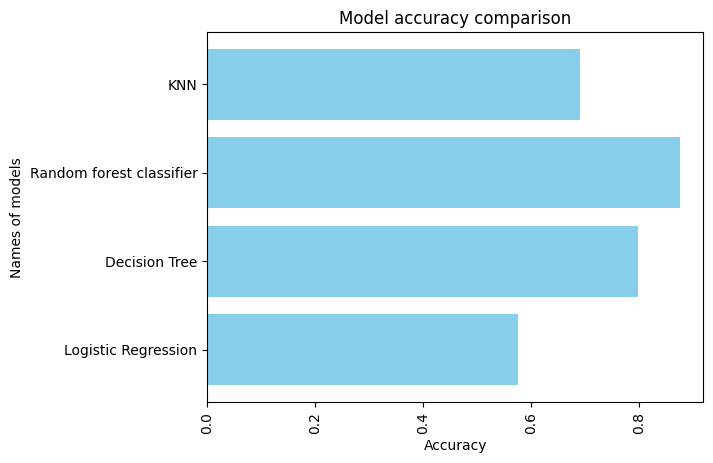

In [ ]:
#showing all models accuracy in bar plot
names_models =["Logistic Regression","Decision Tree","Random forest classifier","KNN"]

accuracy_scores =[0.5756,0.7970,0.8745,0.6900]

#creating bar plot
plt.barh(names_models,accuracy_scores,color='skyblue')
plt.ylabel("Names of models")
plt.xlabel("Accuracy")
plt.title("Model accuracy comparison")
plt.xticks(rotation=90)
plt.show()

##Machine Learning Summary

Q1:What method will you use for machine learning based predictions for credit card approval?

Ans : As it is classification problem choosing Logistic Regression, Decision
Tree, Random Forest and K-Nearest Neighbor salgorithms to find which model have better accuracy.

Q2:Please justify the most appropriate model.

Ans : Random forest classifier is our most appropriate model with mean cv accuracy of 87.45%.

Q3:Please perform necessary steps required to improve the accuracy of your model.

Ans :To improve the accrucy we have implemented the smote technique and in data analysis we have perform the feature engineering.

Q4:Please compare all models (at least 4  models).

1. Logistic Regression :-Accuracy: 0.5756457564575646,
2. Decision Tree :-Accuracy: 0.7970479704797048,
3. Random Forest :-Accuracy: 0.8745387453874539,
4. K-Nearest Neighbors :-Accuracy: 0.6900369003690037,
After comparing these model,Random Forest Classifier have highest accuracy.

##MySQL Section

In [ ]:
df2 =credit_card_clean
df2.head()

,Ind_Id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,Years_of_Birth,Employed_Years,Type_Occupation,Family_Members,Label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,Unknown,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,Unknown,2,1
2,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,Unknown,2,1
3,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,Unknown,2,1
4,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,61.0,0.0,Unknown,2,1


In [ ]:
import duckdb

In [ ]:
conn=duckdb.connect()

In [ ]:
conn.register("df2",df2)

Q1:Group the customers based on their income type and find the average of their annual income.

In [ ]:
conn.execute("select Type_Income,avg(Annual_Income) as avg_annualincome from df2 group by Type_Income").fetchdf()

,Type_Income,avg_annualincome
0,Pensioner,144606.402000
1,Working,172688.564103
2,State servant,191528.089888
3,Commercial associate,196165.161290


Q2:Find the female owners of cars and property.

In [ ]:
conn.execute("select * from df2 where Gender='F' AND (Car_Owner='Y' and Property_Owner='Y') ").fetchdf()

,Ind_Id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,Years_of_Birth,Employed_Years,Type_Occupation,Family_Members,Label
0,5018498,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,52.0,3.0,Cooking staff,2,1
1,5018503,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,52.0,3.0,Cooking staff,2,1
2,5036660,F,Y,Y,0,76500.0,Pensioner,Secondary / secondary special,Married,House / apartment,65.0,0.0,Unknown,2,1
3,5053254,F,Y,Y,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,51.0,6.0,Managers,2,1
4,5065348,F,Y,Y,0,202500.0,Working,Higher education,Married,House / apartment,42.0,11.0,High skill tech staff,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,5118580,F,Y,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,36.0,5.0,Laborers,2,0
151,5048458,F,Y,Y,1,126000.0,Working,Higher education,Married,House / apartment,26.0,0.0,Unknown,3,0
152,5023719,F,Y,Y,0,175500.0,Pensioner,Higher education,Married,House / apartment,60.0,0.0,Unknown,2,0
153,5024049,F,Y,Y,1,144000.0,Working,Higher education,Married,House / apartment,35.0,8.0,Accountants,3,0


Q3:Find the male customers who are staying with their families.

In [ ]:
conn.execute("select Type_Income,avg(Annual_Income) as avg_annualincome from df2 group by Type_Income").fetchdf()

,Type_Income,avg_annualincome
0,Pensioner,144606.402000
1,Working,172688.564103
2,State servant,191528.089888
3,Commercial associate,196165.161290


Q4:Please list the top five people having the highest income.

In [ ]:
conn.execute("select Ind_Id,max(Annual_Income) as highes_income from df2 group by Ind_Id order by max(Annual_Income) desc limit 5 ").fetchdf()

,Ind_Id,highes_income
0,5146467,360000.0
1,5028737,360000.0
2,5044939,360000.0
3,5045614,360000.0
4,5025161,360000.0


Q5:How many married people are having bad credit?

In [ ]:
conn.execute("select count(Marital_Status) as count_married_pep from df2 where Label = 1 and Marital_Status='Married'").fetchdf()

,count_married_pep
0,92


Q6:What is the highest education level and what is the total count?

In [ ]:
conn.execute("select Education,count(*) as total_count from df2 group by  Education order by total_count limit 1").fetchdf()

,Education,total_count
0,Academic degree,2


Q7:Between married males and females, who is having more bad credit?

In [ ]:
conn.execute("select Gender,Marital_Status,count(*) as bad_creditcount from df2 where Label =1 and Marital_Status='Married' group by Gender,Marital_Status order by bad_creditcount desc").fetchdf()

,Gender,Marital_Status,bad_creditcount
0,F,Married,50
1,M,Married,42


#**Thank** **You**